<a href="https://colab.research.google.com/github/saktiworkstation/road-to-ai-developer/blob/main/Advance_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sumber | Source | Refrence


---


Code : https://www.kaggle.com/code/udit1907/linear-advanced-regression-guided-car-purchase


---

Data : https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

In [3]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#core imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
#load dataset and assign it to a variable
vehicles=pd.read_csv("/content/car data.csv")

In [5]:
#use the 'head' method to show the first five rows of the table as well as their names.
vehicles.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
vehicles.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [8]:
vehicles.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


<Axes: xlabel='Owner', ylabel='Selling_Price'>

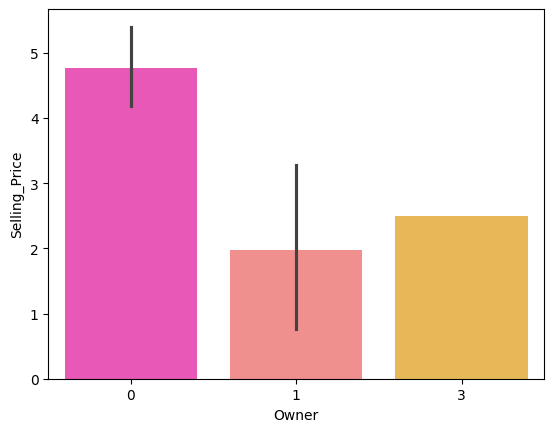

In [9]:
sns.barplot(x='Owner',y='Selling_Price',data=vehicles,palette='spring')

<Axes: xlabel='Transmission', ylabel='Selling_Price'>

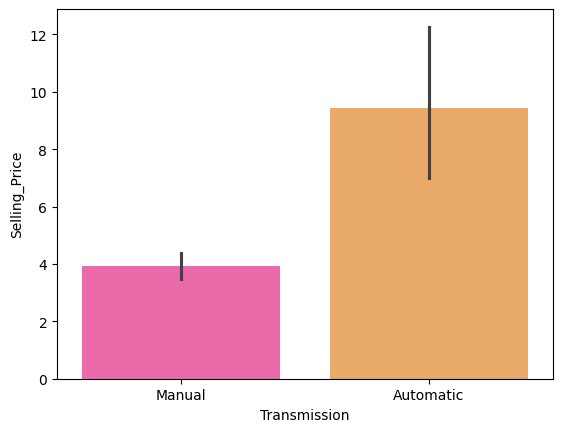

In [10]:
sns.barplot(x='Transmission',y='Selling_Price',data=vehicles,palette='spring')

<Axes: xlabel='Fuel_Type', ylabel='Selling_Price'>

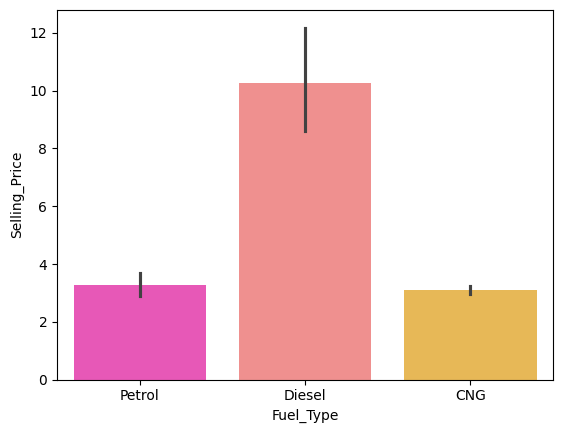

In [11]:
sns.barplot(x='Fuel_Type',y='Selling_Price',data=vehicles,palette='spring')

<Axes: xlabel='Seller_Type', ylabel='Selling_Price'>

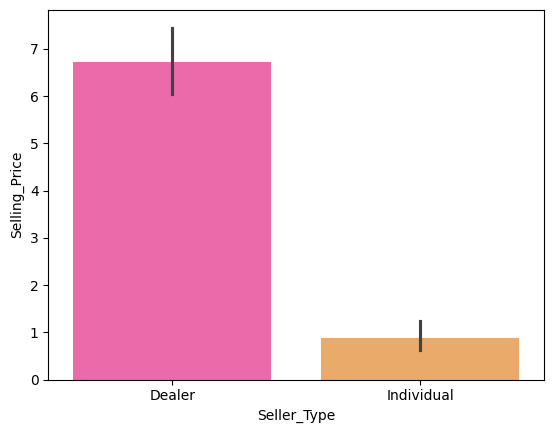

In [12]:
sns.barplot(x='Seller_Type',y='Selling_Price',data=vehicles,palette='spring')

<Figure size 1000x1000 with 0 Axes>

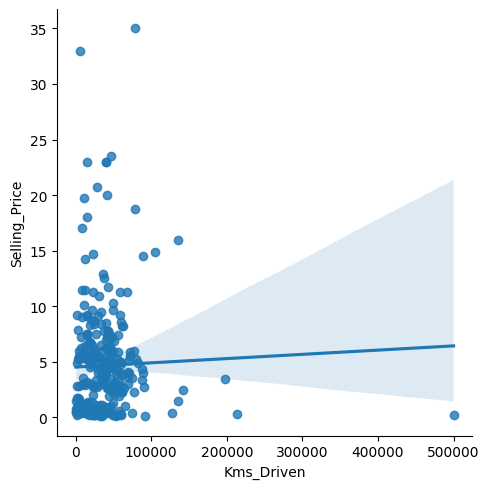

In [13]:
plt.figure(figsize=(10,10))
sns.lmplot(x='Kms_Driven',y='Selling_Price',data=vehicles)

<Figure size 1000x1000 with 0 Axes>

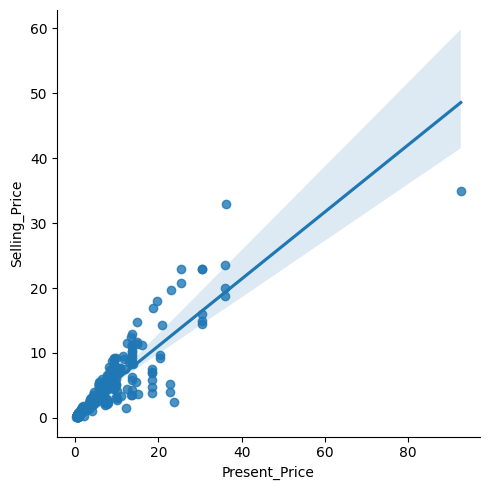

In [14]:
plt.figure(figsize=(10,10))
sns.lmplot(x='Present_Price',y='Selling_Price',data=vehicles)

In [15]:
#creating a new column 'Vehicle_Age' and storing the age of the vehicles to establish a direct relationship between the age and selling price
vehicles['Vehicle_Age']=2020- vehicles['Year']

#check out the newly added column
vehicles.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0,2
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0,5
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0,5
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0,4
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0,5


<Axes: xlabel='Vehicle_Age', ylabel='Selling_Price'>

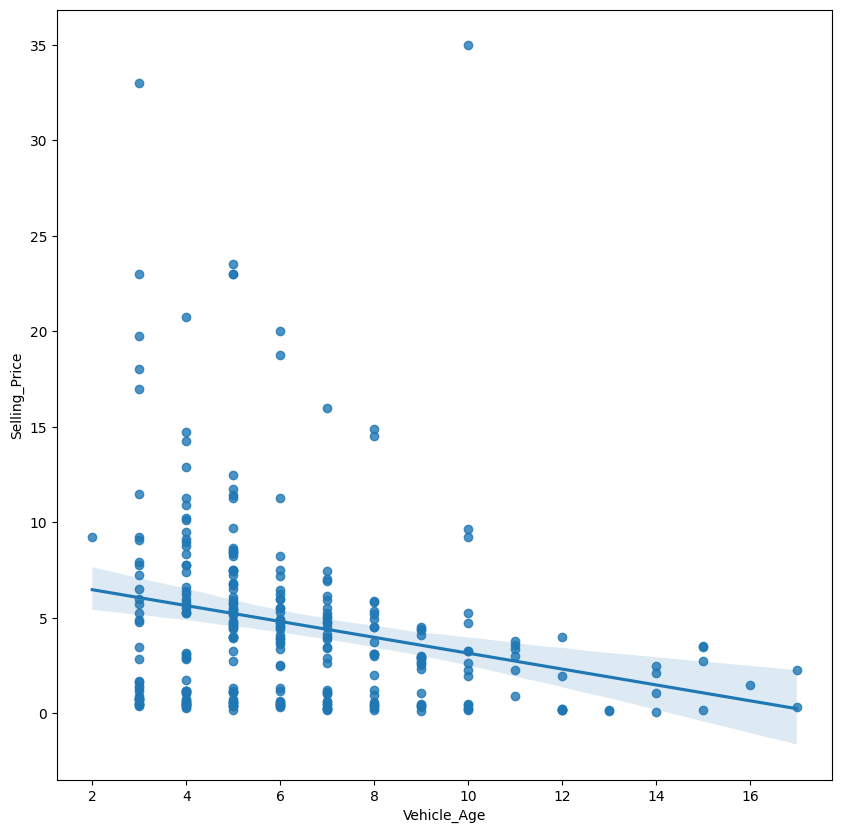

In [16]:
plt.figure(figsize=(10,10))
sns.regplot(x='Vehicle_Age',y='Selling_Price',data=vehicles)

In [17]:
#using Pandas' built in function 'get_dummies()' to swiftly map the categorical values to integers like (0/1/2/3....)
vehicles=pd.get_dummies(vehicles,columns=['Fuel_Type','Transmission','Seller_Type'],drop_first=True)

#dropping the Year column since it becomes redundant and irrelevant after Vehicle_Age column
vehicles.drop(columns=['Year'],inplace=True)

#check out the dataset with new changes
vehicles.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,Vehicle_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Seller_Type_Individual
0,ritz,3.35,5.59,27000,0,6,False,True,True,False
1,sx4,4.75,9.54,43000,0,7,True,False,True,False
2,ciaz,7.25,9.85,6900,0,3,False,True,True,False
3,wagon r,2.85,4.15,5200,0,9,False,True,True,False
4,swift,4.60,6.87,42450,0,6,True,False,True,False


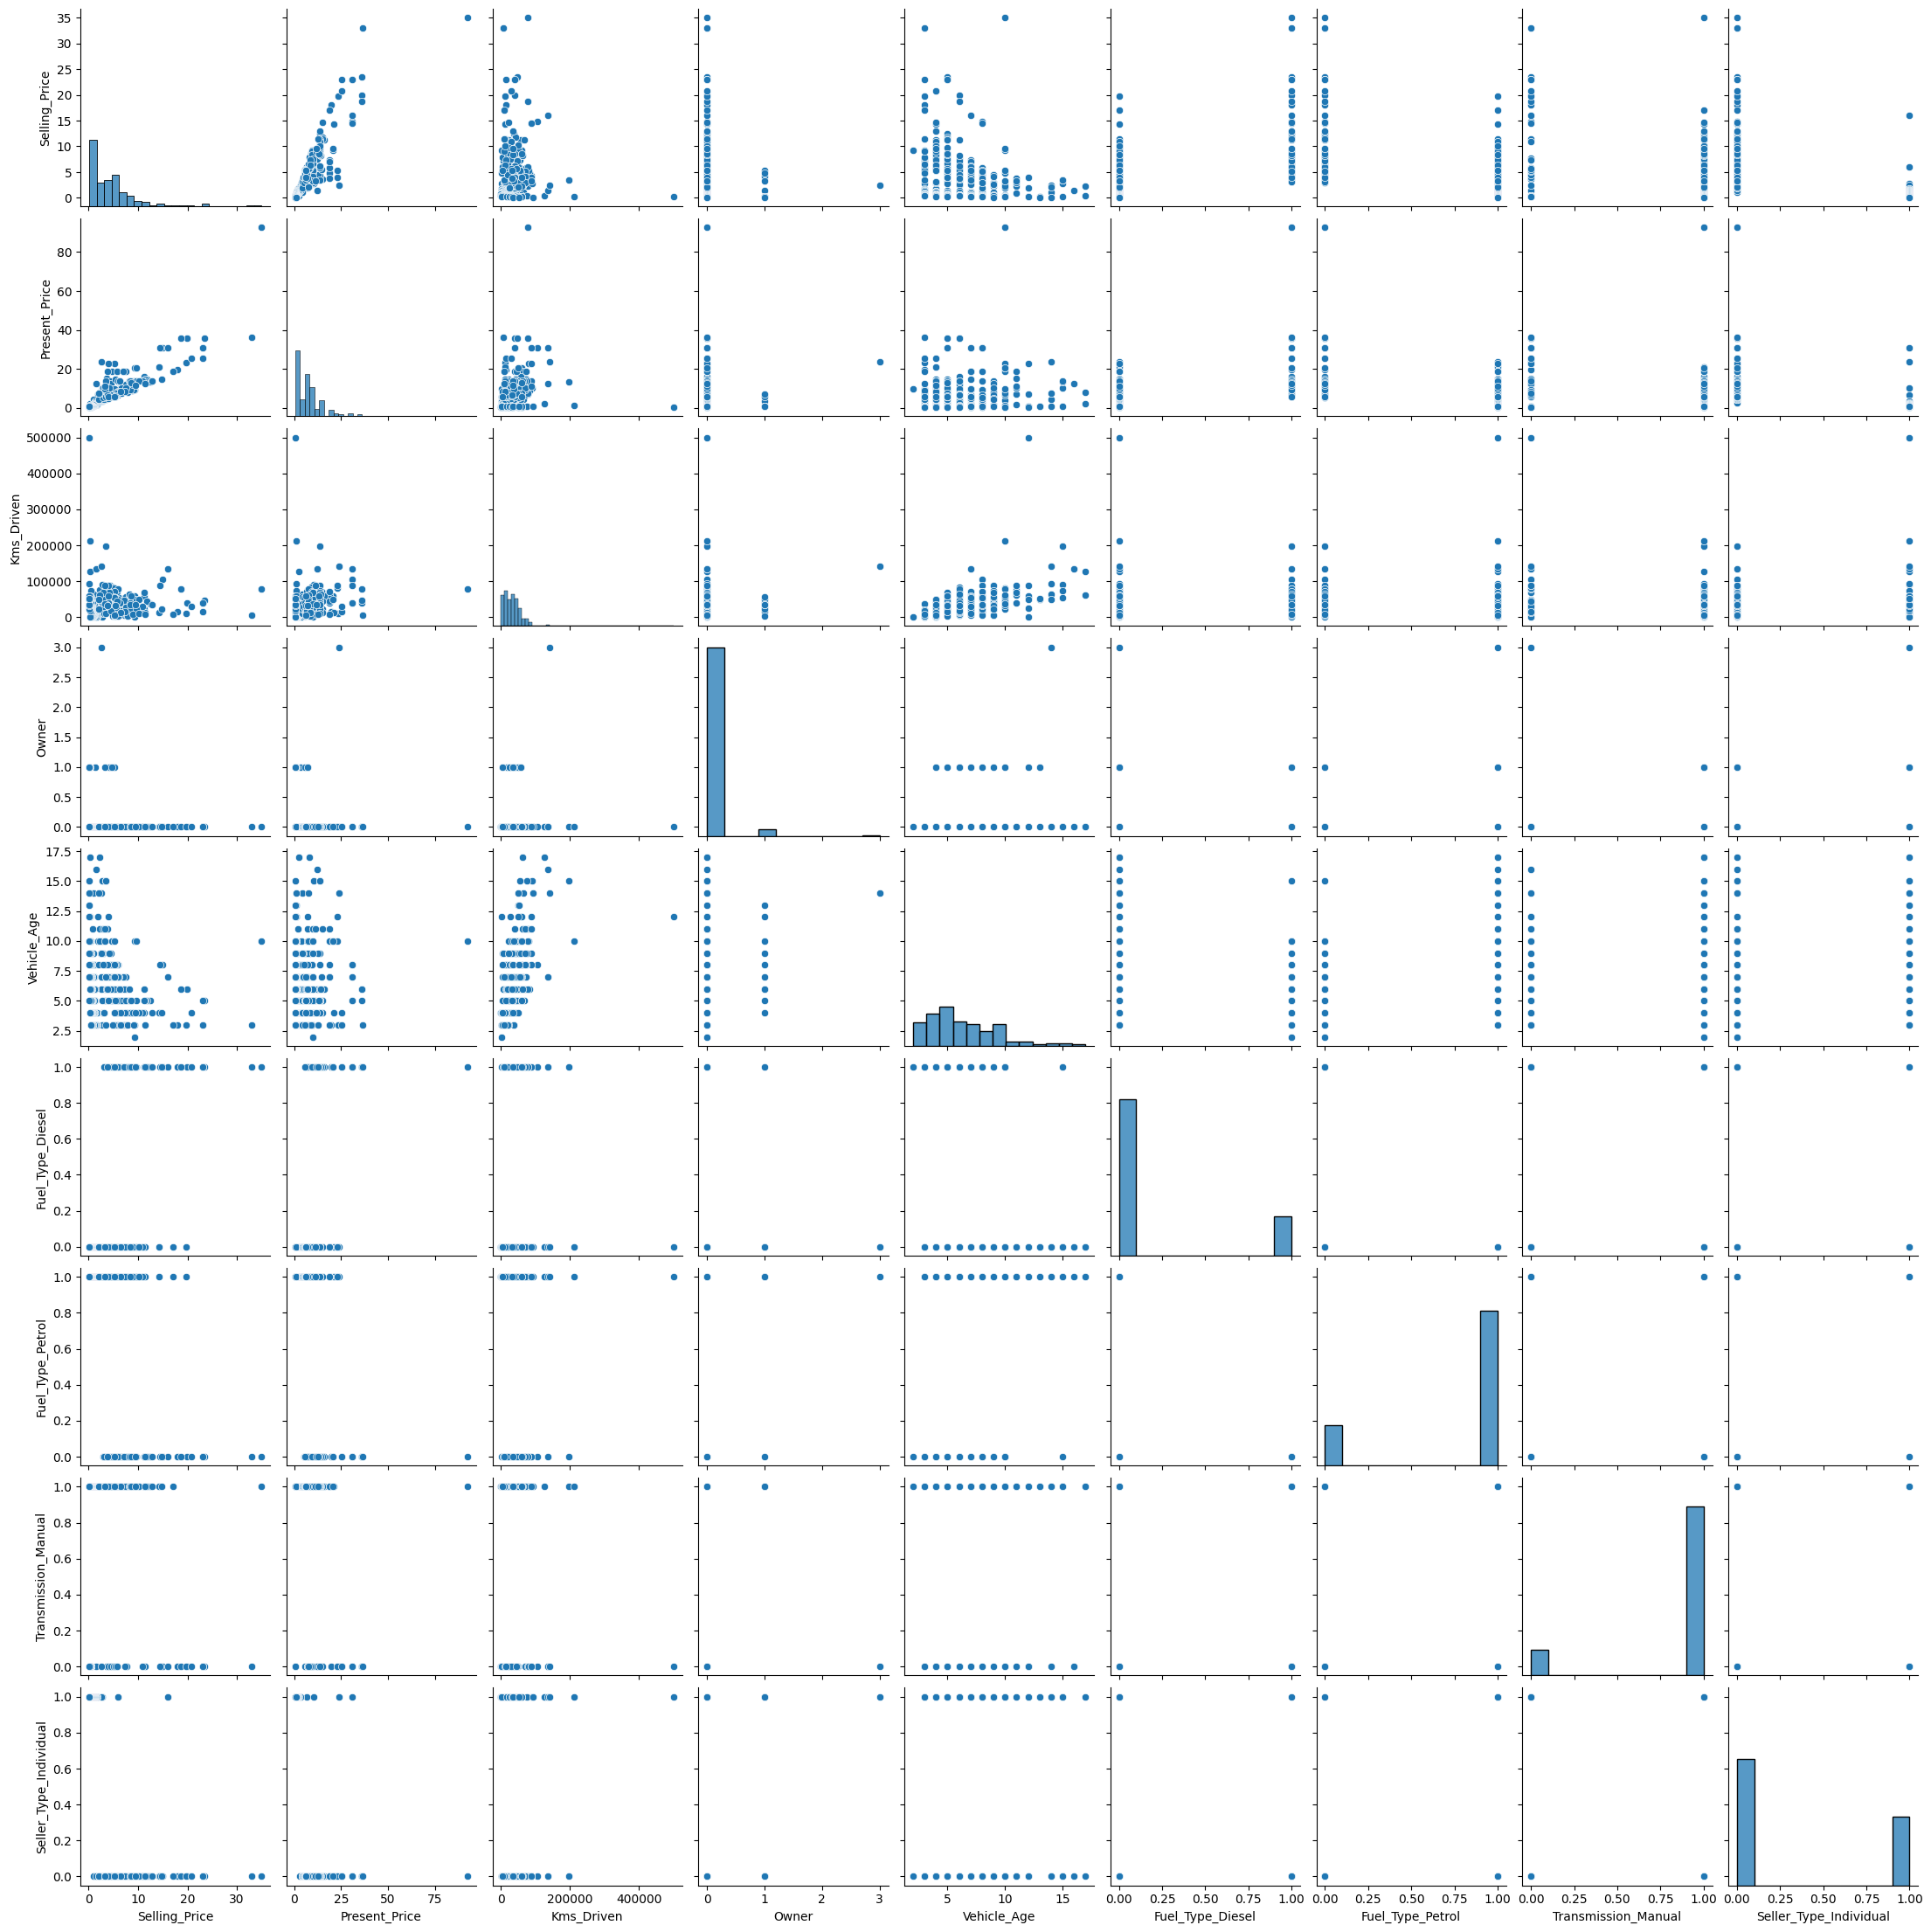

In [18]:
sns.pairplot(vehicles)

<Axes: >

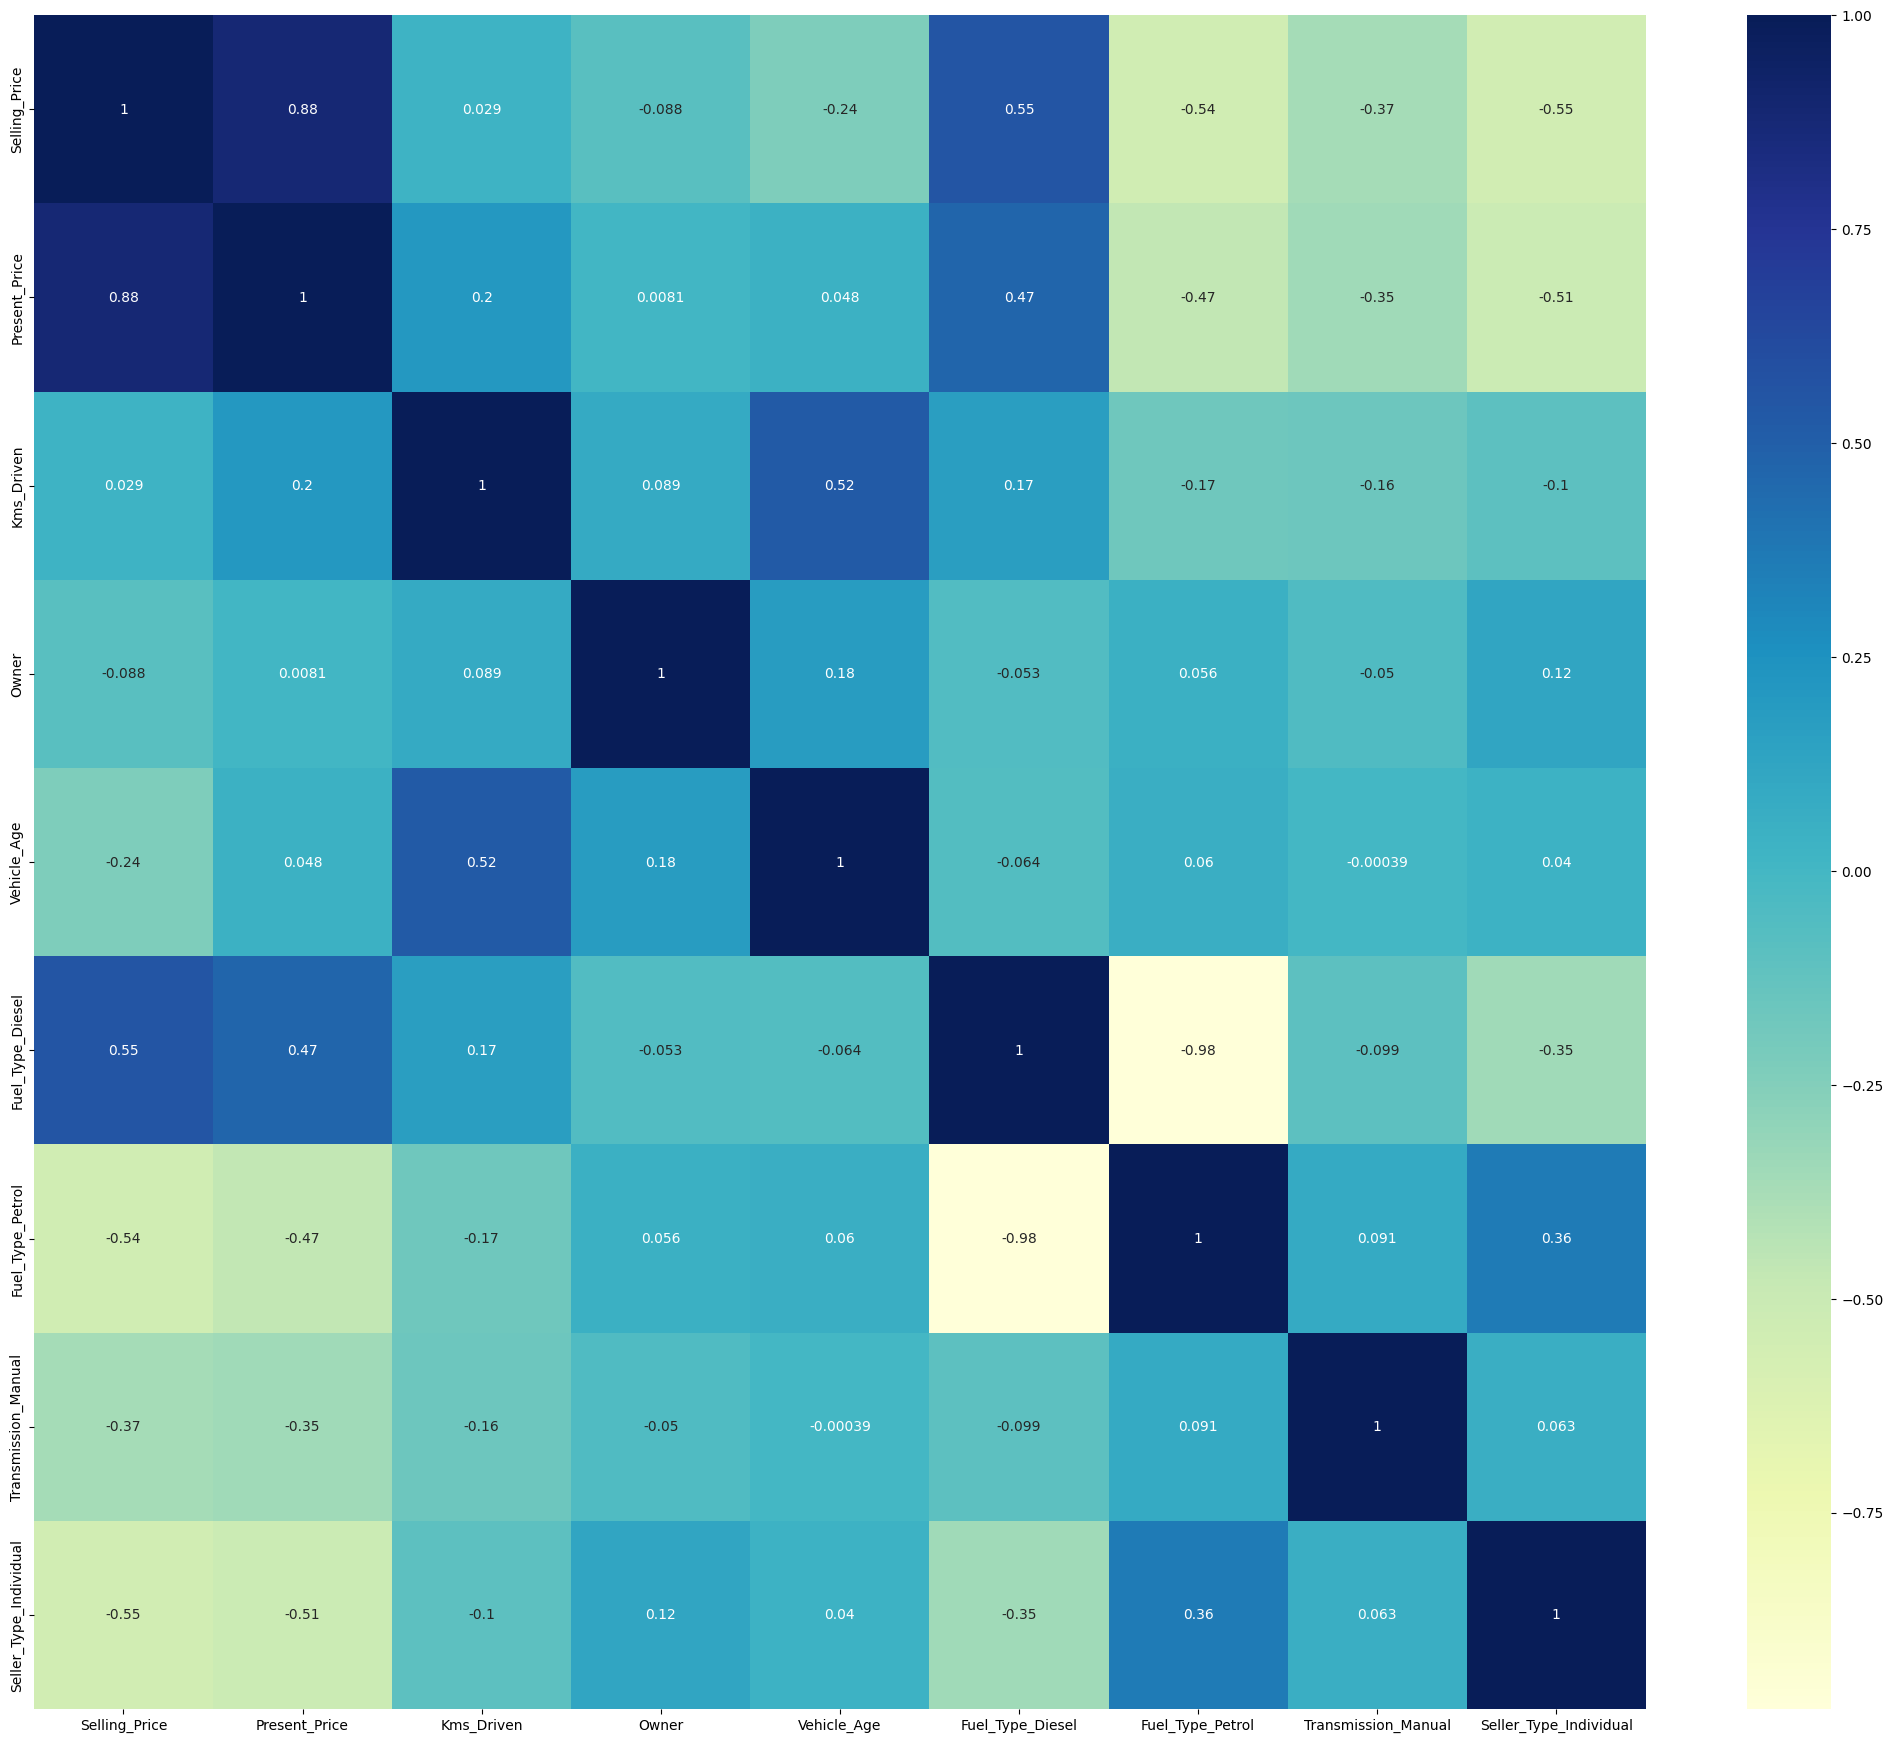

In [20]:
# Calculate correlations excluding the 'Car_Name' column
correlations = vehicles.drop(columns=['Car_Name']).corr()

# Rest of your code remains the same
indx = correlations.index
plt.figure(figsize=(26, 22))
sns.heatmap(vehicles[indx].corr(), annot=True, cmap="YlGnBu")

In [21]:
# We're splitting up our data set into groups called 'train' and 'test'
from sklearn.model_selection import train_test_split

np.random.seed(0)
vehicles_train,vehicles_test = train_test_split(vehicles, test_size=0.3, random_state=100)

# We'll perform feature scaling to ensure normalization of the data within a particular range.
#Sometimes, it also helps in speeding up the calculations in an algorithm.
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

#features we need to scale are assigned as a list.
var=['Selling_Price','Present_Price','Kms_Driven','Vehicle_Age']

#scaling the training data(fitting the parameters and transforming the values)
vehicles_train[var]=scaler.fit_transform(vehicles_train[var])

#transforming the test data.We avoid fitting the values to prevent data leakage!
vehicles_test[var]=scaler.transform(vehicles_test[var])

#We will toss out the Car_Name column from training and test data because it only has text info that the linear regression model can't use!

X_test=vehicles_test.drop(columns=['Car_Name','Selling_Price'],axis=1)
y_test=vehicles_test['Selling_Price']

X_train=vehicles_train.drop(columns=['Car_Name','Selling_Price'],axis=1)
y_train=vehicles_train['Selling_Price']

In [22]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()

lm.fit(X_train,y_train)

LinearRegression()

In [23]:
# print the intercept of best-fit line
print(lm.intercept_)

0.17857294626649278


In [24]:
# temp here stores the numerical columns from the vehicles dataset that influence the prediction
temp=vehicles.drop(columns=['Car_Name','Selling_Price'])

coeff_df = pd.DataFrame(lm.coef_,temp.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Present_Price,0.742407
Kms_Driven,-0.041166
Owner,0.117336
Vehicle_Age,-0.227644
Fuel_Type_Diesel,0.486842
Fuel_Type_Petrol,0.081617
Transmission_Manual,-0.312737
Seller_Type_Individual,-0.221881


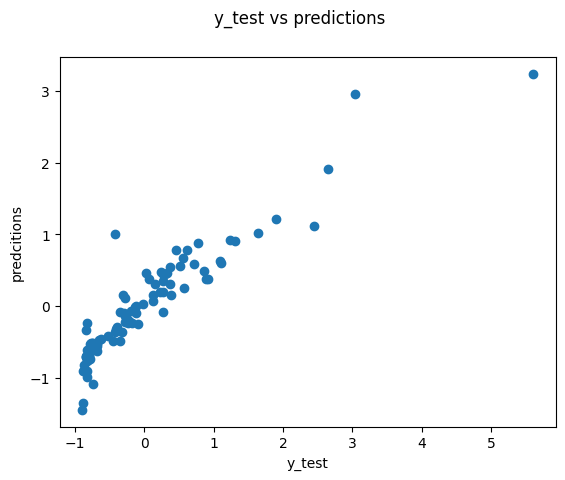

In [25]:
predictions=lm.predict(X_test)


fig = plt.figure()
# Plot-label
fig.suptitle('y_test vs predictions')

#X-label
plt.xlabel('y_test')

# Y-label
plt.ylabel('predcitions')
plt.scatter(y_test,predictions)

Text(0.5, 0.98, 'Residual Analysis')

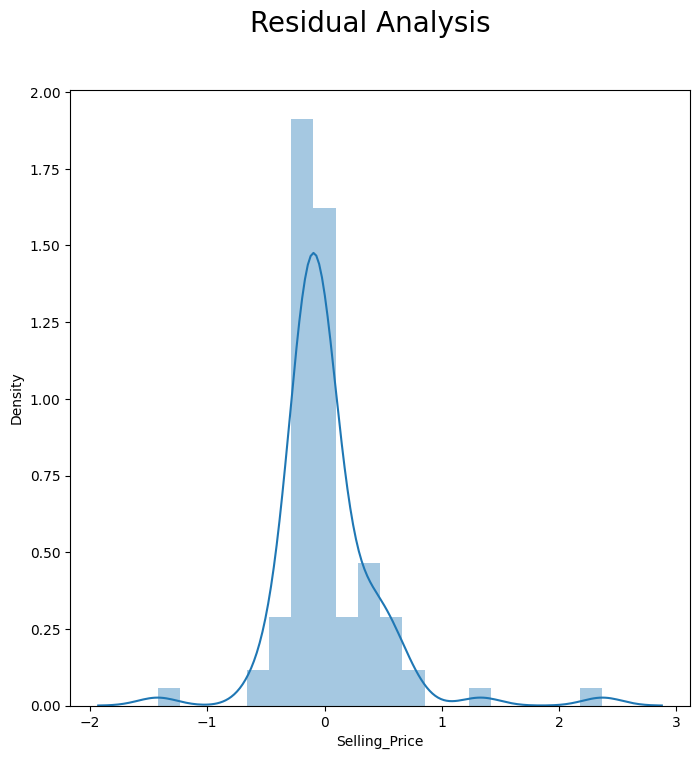

In [26]:
fig=plt.figure(figsize=(8,8))

sns.distplot((y_test-predictions),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

In [27]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.2522278859371734
MSE: 0.1715249112420602
RMSE: 0.4141556606423003


In [28]:
R2 = metrics.r2_score(y_test,predictions)
R2

0.8316982715837706

In [29]:
# Import xgboost ensemble model
import xgboost

#core import for hyperparamter tuning
from sklearn.model_selection import RandomizedSearchCV

#creates a xgbRegressor object
regressor=xgboost.XGBRegressor()

In [30]:
#Hyperparamter_Tuning
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]

# Define the grid of hyperparameters to search
parameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [31]:
# Set up the random search with 5-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=parameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 3,
            verbose = 5,
            return_train_score = True,
            random_state=42)

#train on the RandomSearchCv object to get best estimators
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=50, n_jobs=3,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [32]:
#getting the best estimators
random_cv.best_estimator_

XGBRegressor(base_score=1, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=900, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [33]:
#getting the best params
random_cv.best_params_

{'n_estimators': 900,
 'min_child_weight': 1,
 'max_depth': 15,
 'learning_rate': 0.1,
 'booster': 'gbtree',
 'base_score': 1}

In [34]:
# reinitializing the regressor object with the best probable estimators
regressor=xgboost.XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=2, missing=np.nan, monotone_constraints='()',
             n_estimators=1100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
# fitting the xgbRegressor on our training data
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.75, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy=None, importance_type='gain',
             interaction_constraints='', learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
             max_depth=5, max_leaves=None, min_child_weight=2, missing=nan,
             monotone_constraints='()', multi_strategy=None, n_estimators=1100,
             n_jobs=0, num_parallel_tree=1, ...)

In [36]:
# fetching the predictions on our test data
predictions2=regressor.predict(X_test)

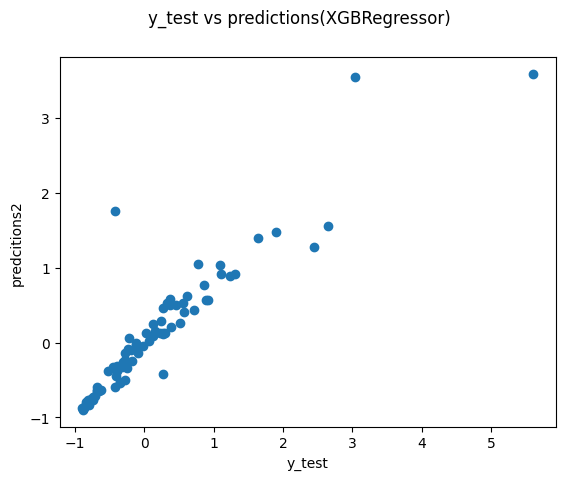

In [37]:
fig = plt.figure()
# Plot-label
fig.suptitle('y_test vs predictions(XGBRegressor)')

#X-label
plt.xlabel('y_test')

# Y-label
plt.ylabel('predcitions2')
plt.scatter(y_test,predictions2)

Text(0.5, 0.98, 'Residual Analysis')

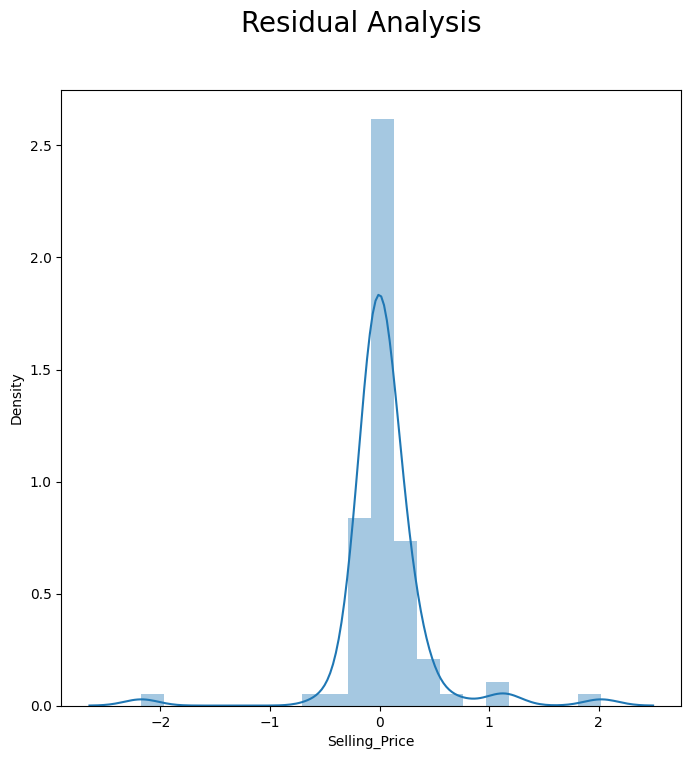

In [38]:
fig=plt.figure(figsize=(8,8))

sns.distplot((y_test-predictions2),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

In [39]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions2))
print('MSE:', metrics.mean_squared_error(y_test, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions2)))

MAE: 0.17598710442424287
MSE: 0.15196759819282543
RMSE: 0.38983021713667276


In [40]:
R2 = metrics.r2_score(y_test,predictions2)
R2

0.8508880765253887